In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Diccionario de palabras con sus vectores embedding (representación vectorial simple)
word_embeddings = {
    'happy': torch.tensor([0.8, 0.6, 0.1]),  # Representación simple de "feliz"
    'joyful': torch.tensor([0.75, 0.65, 0.05]),  # Sinónimo cercano a "happy"
    'content': torch.tensor([0.78, 0.58, 0.12]),  # Otro sinónimo
    'sad': torch.tensor([0.2, 0.3, 0.9]),  # Antónimo de "happy"
    'angry': torch.tensor([0.3, 0.4, 0.8]),  # No es sinónimo, pero cercano a "sad"
    'excited': torch.tensor([0.9, 0.6, 0.2])  # Similar a "happy", pero más energético
}


In [3]:
# Vector de la palabra query ("happy")
query = word_embeddings['happy']

# Vectores de las palabras keys (todas las palabras)
keys = torch.stack(list(word_embeddings.values()))

In [5]:
# Paso 1: Calcular la similitud coseno entre el query y todos los keys
similarities = F.cosine_similarity(query.unsqueeze(0), keys, dim=1)

# Paso 2: Asociar las similitudes con las palabras
words = list(word_embeddings.keys())
similarities_dict = {word: sim.item() for word, sim in zip(words, similarities)}

# Ordenar las palabras por similitud en orden descendente
sorted_similarities = sorted(similarities_dict.items(), key=lambda x: x[1], reverse=True)


Similitud de palabras con 'happy':
happy: 1.0000
content: 0.9997
joyful: 0.9963
excited: 0.9950
angry: 0.5907
sad: 0.4413


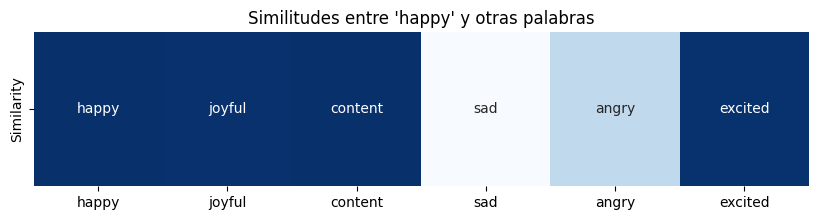

In [6]:
# Mostrar resultados
print("Similitud de palabras con 'happy':")
for word, sim in sorted_similarities:
    print(f"{word}: {sim:.4f}")

# Paso 3: Visualización de las similitudes usando un heatmap
# Crear una matriz de similitudes
similarities_matrix = np.array([list(similarities_dict.values())]).reshape(1, -1)

# Configurar el heatmap
plt.figure(figsize=(10, 2))  # Ajustar tamaño para acomodar las etiquetas
sns.heatmap(
    similarities_matrix,
    annot=np.array([list(similarities_dict.keys())]),  # Etiquetas de palabras como anotaciones
    fmt='',  # No aplicar formato en las anotaciones
    cmap="Blues",
    cbar=False,
    xticklabels=list(similarities_dict.keys()),  # Etiquetas en el eje X
    yticklabels=['Similarity']  # Etiqueta para el eje Y
)
plt.title("Similitudes entre 'happy' y otras palabras")
plt.show()